In [9]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

In [10]:
hf = h5py.File('gammaray_lab4.h5', 'r')            

In [11]:
hf.keys()

KeysView(<HDF5 file "gammaray_lab4.h5" (mode r)>)

In [12]:
data = np.array(hf.get('data'))

In [18]:
data[:,0]

array([9.40680016e+08, 3.15000000e+02, 4.50000000e+01, 1.00000000e+01])

In [7]:
hf.close()

# Problem 1

1) Down load the data from the course website (gammaray_lab4.h5), and import it into your working environment. The data has 4 columns and more than 25 million rows. The columns are time (in gps seconds), Solar phase (deg) showing the position of the sun relative to the orbit, Earth longitude (deg) giving the position of the spacecraft relative to the ground, and particle counts. Make a few plots, generally exploring your data and making sure you understand it. Give a high level description of the data features you see. Specifically comment on whether you see signal contamination in your data, and how you plan to build a background pdf().

In [1]:
plt.step(data[0,:], data[1,:])

NameError: name 'plt' is not defined

Text(0.5,1,'Earth longitude (deg) vs Time (gps seconds)')

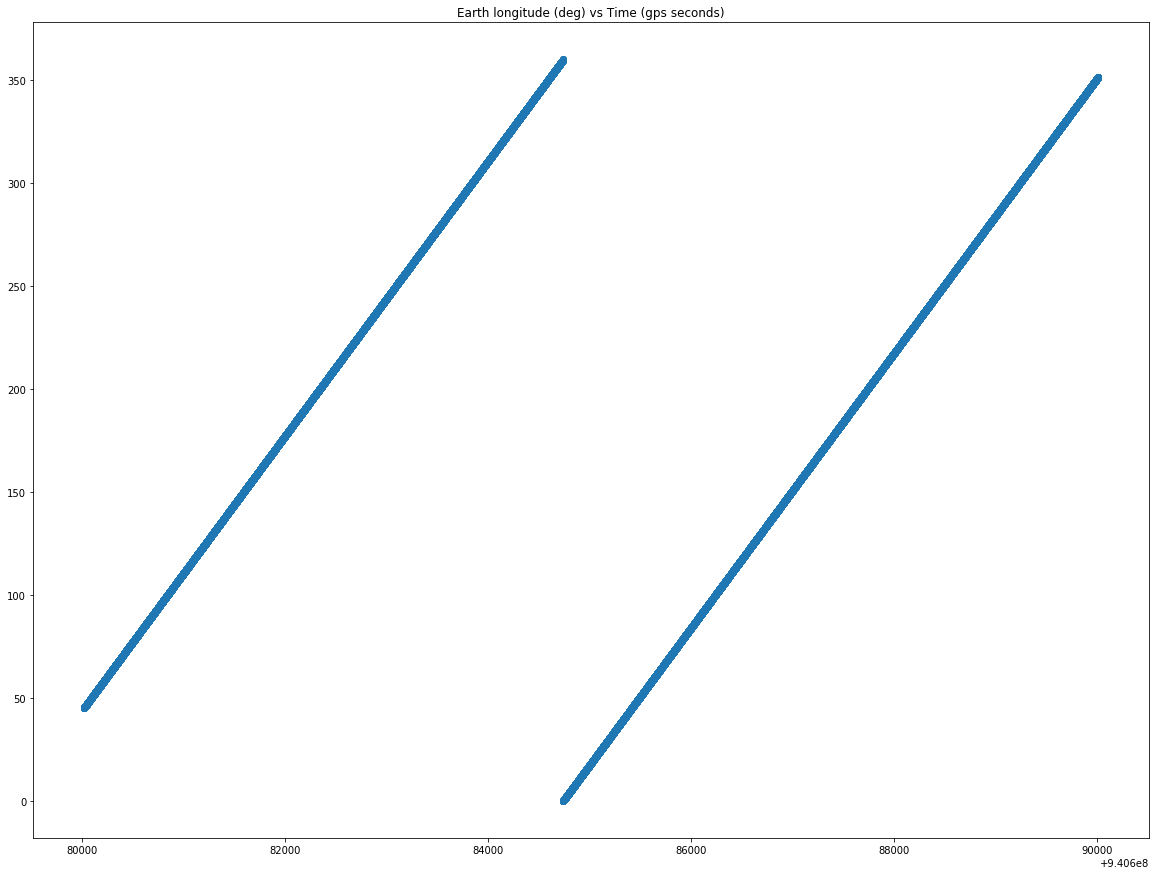

In [33]:
plt.scatter(data[0,1:100000], data[2,1:100000])
plt.title("Earth longitude (deg) vs Time (gps seconds)")

Text(0.5,1,'Solar Phase (deg) vs Time (gps seconds)')

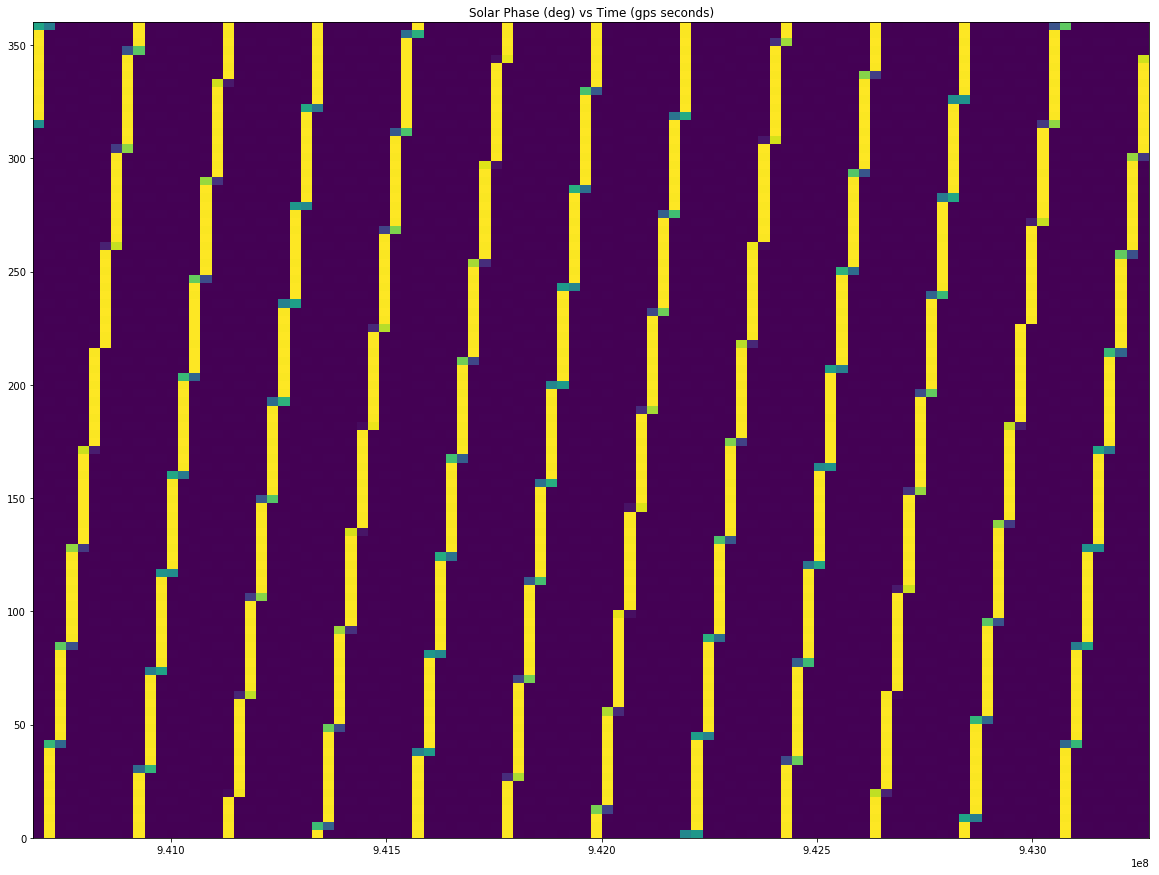

In [20]:
plt.hist2d(data[0,:], data[1,:], bins = 100)
plt.title("Solar Phase (deg) vs Time (gps seconds)")

Text(0.5,1,'Particle Count vs Time (gps seconds)')

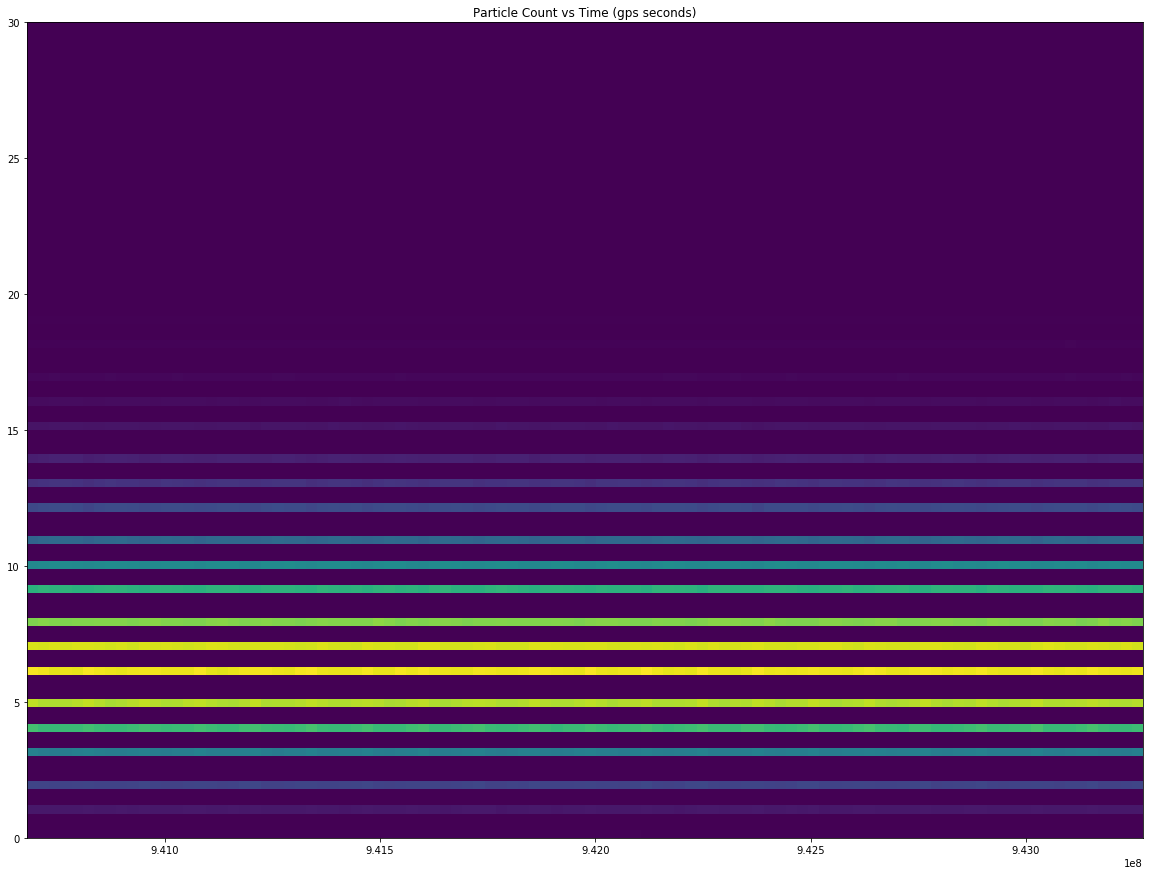

In [21]:
plt.hist2d(data[0,:], data[3,:], bins = 100)
plt.title("Particle Count vs Time (gps seconds)")

Text(0.5,1,'Particle Count vs Longitude')

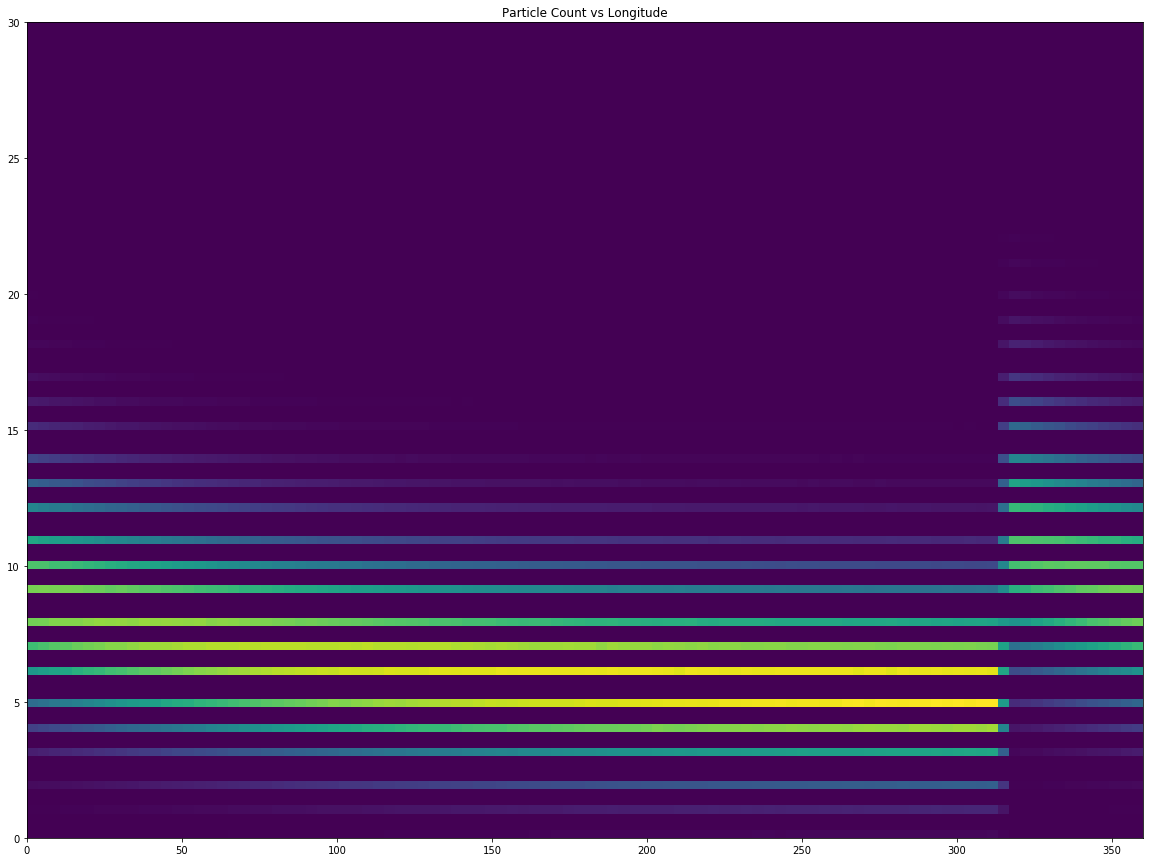

In [25]:
plt.hist2d(data[2,:], data[3,:], bins = 100)
plt.title("Particle Count vs Longitude")

Text(0.5,1,'Particle Count vs Solar Phase')

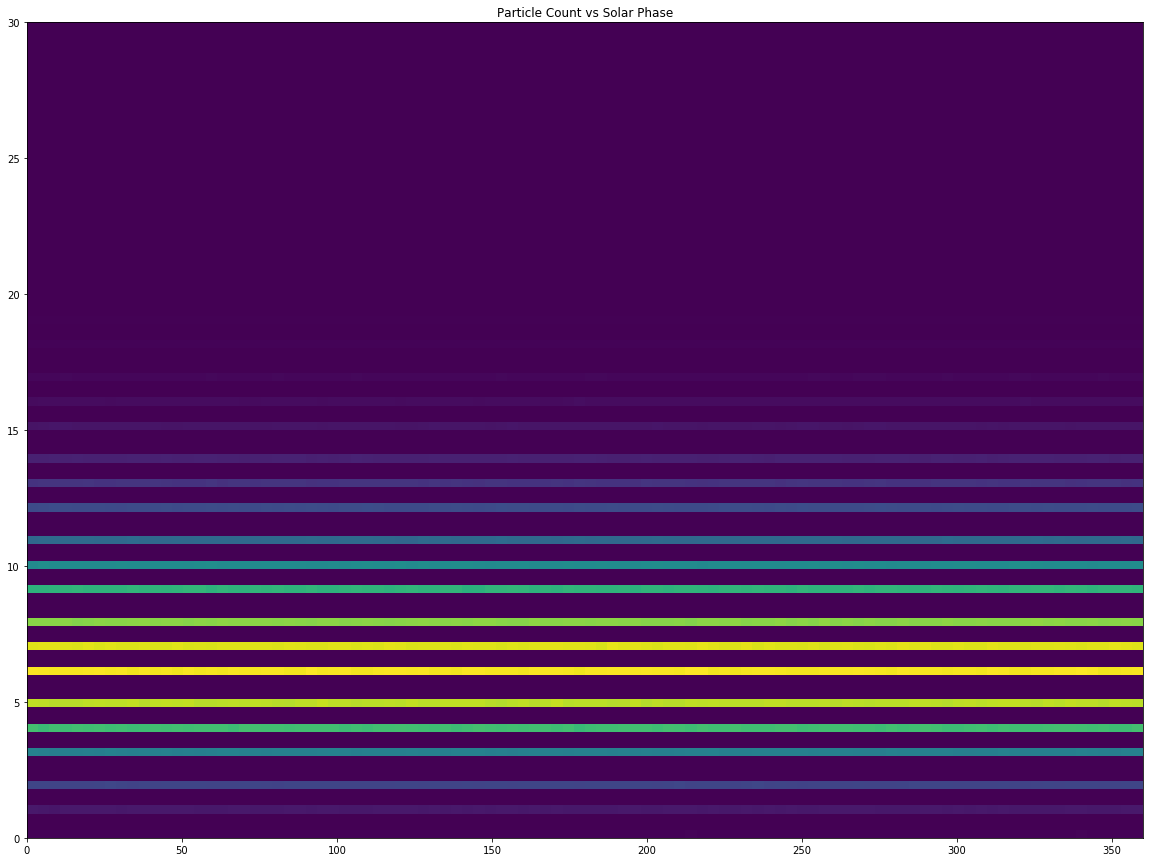

In [29]:
plt.hist2d(data[1,:], data[3,:], bins = 100)
plt.title("Particle Count vs Solar Phase")

In [ ]:
#Correlate Particle count, longitude, and time
#PDF with particle count at longitude, change in PDF at time
#We are getting consistent particle counts at the yellow areas in "Particle Count vs Longitude"
#Take the mean of each longitude
#time%2pi = longitude
#at bin of index(longitude), add value, value = particle count
#After adding all values to bins, average all bins to get new values
xvals=[]
background=[]
for i in range(len(data[0,1:10])):
    xvals.append(i)
    background.append(stats.poisson.pmf(data[3,:], i))
plt.step(xvals, background)
plt.show()